# Install Libraries

In [ ]:
!pip install tensorflow pandas numpy sklearn
!pip install pandas scikit-learn
!pip install lime shap
!pip install scikeras
!pip install tslearn

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.metrics import Precision, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, AUC
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from keras.layers import SimpleRNN, Dense
import random
import tensorflow as tf
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.metrics import Precision
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import random
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import pad_sequences

# Read Preprocessed Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_AU_preprocessed = '/content/drive/MyDrive/CKD/Finalised/data/preprocessed/AU/AU_preprocessed_df.csv'
file_path_JP_preprocessed = '/content/drive/MyDrive/CKD/Finalised/data/preprocessed/JP/JP_preprocessed_df.csv'

# Train and Evaluate Models

### TUNED HYPERAMETER MODEL - AU Dataset

In [ ]:
# Read Data
AU_df = pd.read_csv(file_path_AU_preprocessed)
AU_df['COLLECTED'] = pd.to_datetime(AU_df['COLLECTED'])
AU_df = AU_df.reset_index(drop=True)

# Normalize the numeric columns
scaler = MinMaxScaler()
AU_df[['AGE', 'eGFR']] = scaler.fit_transform(AU_df[['AGE', 'eGFR']])

In [ ]:
# List of columns to drop (including non-numeric columns if present)
cols_to_drop = ['ID', 'Kidney_Failure', 'COLLECTED']

X = pad_sequences(AU_df.groupby('ID').apply(lambda group: group.drop(cols_to_drop, axis=1).to_numpy()).tolist(), maxlen=50, dtype='float32', padding='post') #,
y = AU_df.groupby('ID')['Kidney_Failure'].first().to_numpy()

In [ ]:
# Split the data into majority and minority classes
X_majority = X[y == 0]
X_minority = X[y == 1]
y_minority = y[y == 1]

# Determine the number of clusters to match the number of minority instances
n_clusters = len(X_minority)  # 353 in this case

# Cluster the majority class sequences using TimeSeriesKMeans with DTW
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
model.fit(X_majority)

# Use the centroids of the clusters as the new majority samples
X_majority_undersampled = model.cluster_centers_

# Assuming the majority class labels are 0, create a corresponding label array
y_majority_undersampled = np.zeros(len(X_majority_undersampled))

# Combine with the minority class for the final dataset
X_balanced = np.concatenate((X_majority_undersampled, X_minority))
y_balanced = np.concatenate((y_majority_undersampled, y_minority))

# Shuffle the balanced dataset
shuffle_indices = np.random.permutation(np.arange(len(y_balanced)))
X_balanced, y_balanced = X_balanced[shuffle_indices], y_balanced[shuffle_indices]

# Update X and y for model training
X = X_balanced
y = y_balanced

np.save('X_balanced.npy', X_balanced)
np.save('y_balanced.npy', y_balanced)

In [ ]:
X_balanced=np.load('X_balanced.npy')
y_balanced=np.load('y_balanced.npy')

X = X_balanced
y = y_balanced

Epoch 1/100
5/5 [==============================] - 2s 18ms/step - loss: 0.6816 - precision: 0.5294 - recall: 0.3830 - f1_score: 0.4444 - roc_auc: 0.5856 - accuracy: 0.5213
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6783 - precision: 0.5893 - recall: 0.7021 - f1_score: 0.6408 - roc_auc: 0.6100 - accuracy: 0.6064
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6759 - precision: 0.5822 - recall: 0.7908 - f1_score: 0.6707 - roc_auc: 0.6357 - accuracy: 0.6117
Epoch 4/100
1/5 [=====>........................] - ETA: 0s - loss: 0.6692 - precision: 0.5517 - recall: 0.8276 - f1_score: 0.6621 - roc_auc: 0.6634 - accuracy: 0.6172

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


5/5 [==============================] - 0s 16ms/step - loss: 0.6738 - precision: 0.5838 - recall: 0.8156 - f1_score: 0.6805 - roc_auc: 0.6524 - accuracy: 0.6170
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6715 - precision: 0.5855 - recall: 0.8014 - f1_score: 0.6766 - roc_auc: 0.6651 - accuracy: 0.6170
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6695 - precision: 0.5962 - recall: 0.7801 - f1_score: 0.6759 - roc_auc: 0.6826 - accuracy: 0.6259
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6679 - precision: 0.6103 - recall: 0.7553 - f1_score: 0.6751 - roc_auc: 0.6906 - accuracy: 0.6365
Epoch 8/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6664 - precision: 0.6258 - recall: 0.7234 - f1_score: 0.6711 - roc_auc: 0.6963 - accuracy: 0.6454
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6645 - precision: 0.6349 - recall: 0.6844 - f1_score: 0.6587 - roc_auc: 0.7058

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


5/5 [==============================] - 0s 14ms/step - loss: 0.6922 - precision: 0.5245 - recall: 0.5319 - f1_score: 0.5282 - roc_auc: 0.5548 - accuracy: 0.5257
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6888 - precision: 0.5472 - recall: 0.4929 - f1_score: 0.5187 - roc_auc: 0.5731 - accuracy: 0.5434
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6855 - precision: 0.5556 - recall: 0.4787 - f1_score: 0.5143 - roc_auc: 0.5893 - accuracy: 0.5487
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6823 - precision: 0.5750 - recall: 0.4894 - f1_score: 0.5287 - roc_auc: 0.6014 - accuracy: 0.5646
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6794 - precision: 0.5847 - recall: 0.5142 - f1_score: 0.5472 - roc_auc: 0.6141 - accuracy: 0.5752
Epoch 9/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6760 - precision: 0.5992 - recall: 0.5355 - f1_score: 0.5655 - roc_auc: 0.6243

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


5/5 [==============================] - 0s 13ms/step - loss: 0.6731 - precision: 0.5523 - recall: 0.9362 - f1_score: 0.6947 - roc_auc: 0.6266 - accuracy: 0.5894
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6712 - precision: 0.5546 - recall: 0.9362 - f1_score: 0.6966 - roc_auc: 0.6524 - accuracy: 0.5929
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6690 - precision: 0.5605 - recall: 0.9362 - f1_score: 0.7012 - roc_auc: 0.6425 - accuracy: 0.6018
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6667 - precision: 0.5730 - recall: 0.9326 - f1_score: 0.7099 - roc_auc: 0.6694 - accuracy: 0.6195
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6650 - precision: 0.5880 - recall: 0.9362 - f1_score: 0.7223 - roc_auc: 0.6629 - accuracy: 0.6407
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6631 - precision: 0.5986 - recall: 0.9362 - f1_score: 0.7303 - roc_auc: 0.6703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


5/5 [==============================] - 0s 15ms/step - loss: 0.6837 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - roc_auc: 0.6495 - accuracy: 0.4991
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6828 - precision: 0.7500 - recall: 0.0106 - f1_score: 0.0209 - roc_auc: 0.6559 - accuracy: 0.5027       
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6818 - precision: 0.8182 - recall: 0.0636 - f1_score: 0.1180 - roc_auc: 0.6438 - accuracy: 0.5239
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 0.6807 - precision: 0.8148 - recall: 0.3110 - f1_score: 0.4501 - roc_auc: 0.6459 - accuracy: 0.6195
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6797 - precision: 0.6851 - recall: 0.4382 - f1_score: 0.5345 - roc_auc: 0.6417 - accuracy: 0.6177
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6788 - precision: 0.6562 - recall: 0.5194 - f1_score: 0.579

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


5/5 [==============================] - 0s 14ms/step - loss: 0.6839 - precision: 0.5600 - recall: 0.6926 - f1_score: 0.6193 - roc_auc: 0.6305 - accuracy: 0.5735
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6826 - precision: 0.5610 - recall: 0.6820 - f1_score: 0.6156 - roc_auc: 0.6303 - accuracy: 0.5735
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6815 - precision: 0.5706 - recall: 0.6572 - f1_score: 0.6108 - roc_auc: 0.6357 - accuracy: 0.5805
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6804 - precision: 0.5736 - recall: 0.6749 - f1_score: 0.6201 - roc_auc: 0.6424 - accuracy: 0.5858
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6791 - precision: 0.5693 - recall: 0.6820 - f1_score: 0.6206 - roc_auc: 0.6374 - accuracy: 0.5823
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6783 - precision: 0.5636 - recall: 0.6890 - f1_score: 0.6200 - roc_auc: 0.6327

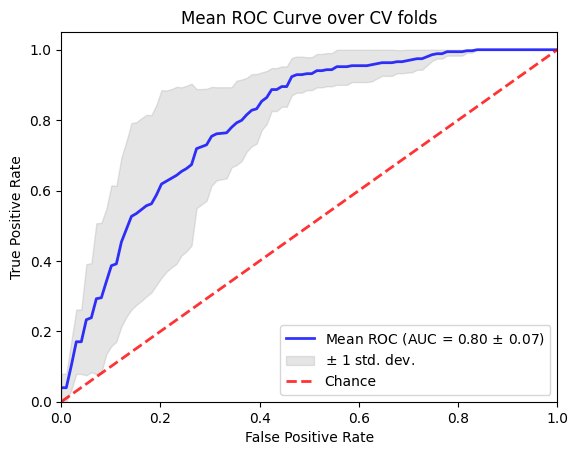

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.metrics import Precision, Recall, AUC, BinaryAccuracy
from tensorflow.keras import backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Set random seeds
seed_value = 0
random.seed(seed_value)
np.random.seed(seed_value)
threshold = 0.5

# List to store metrics across all folds
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
roc_auc_list = []

# Assuming you have a list to store the TPR and FPR for each fold
fold_metrics = []
fold_tprs = []
fold_aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Use Stratified KFold for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed_value)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Define the model
    model = Sequential()
    model.add(SimpleRNN(units=3, input_shape=(50, 3), return_sequences=False))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                    metrics=[Precision(name='precision'),
                            Recall(name='recall'),
                            F1Score(),
                            AUC(name='roc_auc', curve='ROC'),
                            BinaryAccuracy(name='accuracy')])

    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=128)

    # Evaluate the model on the test set
    loss = model.evaluate(X_test, y_test)

    # Get the predictions
    predictions = model.predict(X_test)
    predicted_labels = (predictions >= threshold).astype(int).flatten()

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

    # Compute metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    roc_auc = roc_auc_score(y_test, predictions)

    print(accuracy, precision, recall, f1, specificity, roc_auc)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

    # Calculate ROC curve and ROC AUC for this fold
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    fold_tprs.append(np.interp(mean_fpr, fpr, tpr))
    fold_aucs.append(roc_auc)

# Calculate mean and standard deviation of metrics
mean_accuracy = np.mean(accuracy_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_specificity = np.mean(specificity_list)
mean_roc_auc = np.mean(roc_auc_list)

std_accuracy = np.std(accuracy_list)
std_precision = np.std(precision_list)
std_recall = np.std(recall_list)
std_f1 = np.std(f1_list)
std_specificity = np.std(specificity_list)
std_roc_auc = np.std(roc_auc_list)

# Print mean and standard deviation of metrics
print("Mean Accuracy:", mean_accuracy, "±", std_accuracy)
print("Mean Precision:", mean_precision, "±", std_precision)
print("Mean Recall:", mean_recall, "±", std_recall)
print("Mean F1 Score:", mean_f1, "±", std_f1)
print("Mean Specificity:", mean_specificity, "±", std_specificity)
print("Mean ROC AUC:", mean_roc_auc, "±", std_roc_auc)

# Calculate the mean and standard deviation of the TPRs at each common FPR
mean_tpr = np.mean(fold_tprs, axis=0)
mean_tpr[-1] = 1.0  # Ensure the mean TPR ends at 1
std_tpr = np.std(fold_tprs, axis=0)

mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(fold_aucs)

# Plot the average ROC Curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

# Plot the standard deviation around the mean ROC
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve over CV folds')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

# Assuming mean_fpr, mean_tpr, mean_auc, std_auc are defined for your model
data_to_export = {
    'mean_fpr': mean_fpr,
    'mean_tpr': mean_tpr,
    'mean_auc': mean_auc,
    'std_auc': std_auc,
    'model_name': 'RNN'  # Change this for each model
}

# Exporting to a pickle file
with open(f'{data_to_export["model_name"]}_roc_data.pkl', 'wb') as file:
    pickle.dump(data_to_export, file)

In [ ]:
# Train the final model on the full Australian dataset

import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.metrics import Precision

# Set random seeds for reproducibility
seed_value = 0
random.seed(seed_value)
np.random.seed(seed_value)

# Adjust this threshold as needed
threshold = 0.5

# Define the RNN model for the entire dataset
model = Sequential()
model.add(SimpleRNN(units=3, input_shape=(50, 3), return_sequences=False))
model.add(Dense(10, activation='relu')) # This is a binary classification output
model.add(Dense(1, activation='sigmoid')) # This is a binary classification output

# Compile the model
precision = Precision(thresholds=threshold)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision])

# Fit the model on the entire dataset
model.fit(X, y, epochs=100, batch_size=128) #, class_weight=class_weights)

Epoch 1/100
6/6 [==============================] - 1s 13ms/step - loss: 0.6827 - precision_5: 0.5380
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6789 - precision_5: 0.5794
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6760 - precision_5: 0.5712
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6735 - precision_5: 0.5766
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6710 - precision_5: 0.5845
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6685 - precision_5: 0.6104
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6662 - precision_5: 0.6369
Epoch 8/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6633 - precision_5: 0.6625
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6605 - precision_5: 0.6556
Epoch 10/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6578 - precision

### HELD-OUT TEST DATA - Tuned Model (Without Fine-Tuning)

In [ ]:
from pandas.tseries.offsets import DateOffset
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

JP_df = pd.read_csv(file_path_JP_preprocessed)
JP_df = JP_df.reset_index(drop=True)

# Function to convert Time to months
def convert_to_months(time_str):
    if time_str == 'eGFR(last visit)':
        return 42
    else:
        return int(time_str.split('(')[-1].split('M')[0])

# Apply the function to the 'Time' column to create a new 'Months' column
JP_df['Months'] = JP_df['Time'].apply(convert_to_months)

# Assume a starting date for all IDs
start_date = pd.Timestamp('2020-01-01')

# Create a 'COLLECTED' column based on the 'Months' column
JP_df['COLLECTED'] = JP_df.apply(lambda row: start_date + DateOffset(months=row['Months']), axis=1)

#JP_df.drop(['Time', 'Months'], inplace = True)

# Normalize the numeric columns
scaler = MinMaxScaler()
JP_df[['AGE', 'eGFR']] = scaler.fit_transform(JP_df[['AGE', 'eGFR']])

# Filter UIDs with sequences >= 3
grouped = JP_df.groupby(['ID', 'Kidney_Failure']).size().unstack(fill_value=0)
grouped = grouped[(grouped[1] >= 0) | (grouped[0] >= 0)] #3

# List of columns to drop
cols_to_drop = ['ID', 'Kidney_Failure', 'COLLECTED', 'Time', 'Months']  # add other non-numeric columns if present

X = pad_sequences(JP_df.groupby('ID').apply(lambda group: group.drop(cols_to_drop, axis=1).to_numpy()).tolist(), maxlen=50, dtype='float32', padding='post')
y = JP_df.groupby('ID')['Kidney_Failure'].first().to_numpy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score
import random

# Set random seeds
seed_value = 0
random.seed(seed_value)
np.random.seed(seed_value)
threshold = 0.5

y_pred = model.predict(X)

predicted_labels = (y_pred >= threshold).astype(int).flatten()

# Compute the statistics
true_positives = np.sum((predicted_labels == 1) & (y == 1))
true_negatives = np.sum((predicted_labels == 0) & (y == 0))
false_positives = np.sum((predicted_labels == 1) & (y == 0))
false_negatives = np.sum((predicted_labels == 0) & (y == 1))

tpr = true_positives / (true_positives + false_negatives)
tnr = true_negatives / (true_negatives + false_positives)
fpr = false_positives / (false_positives + true_negatives)
fnr = false_negatives / (false_negatives + true_positives)
accuracy = (true_positives + true_negatives) / len(y)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = 2 * precision * recall / (precision + recall)
specificity = true_negatives / (true_negatives + false_positives)
roc_auc = roc_auc_score(y, predicted_labels)
#roc_auc = roc_auc_score(y, clf.predict_proba(X)[:, 1])

print(accuracy, precision, recall, f1, specificity, roc_auc)

print("TPR: {:.6g}".format(tpr),
      "TNR: {:.6g}".format(tnr),
      "FPR: {:.6g}".format(fpr),
      "FNR: {:.6g}".format(fnr),
      "Accuracy: {:.6g}".format(accuracy),
      "Precision: {:.6g}".format(precision),
      "Recall: {:.6g}".format(recall),
      "F1 Score: {:.6g}".format(f1),
      "Specificity: {:.6g}".format(specificity),
      "ROC-AUC: {:.6g}".format(roc_auc))

19/19 [==============================] - 0s 3ms/step
0.4723618090452261 0.33112582781456956 0.9259259259259259 0.4878048780487805 0.30344827586206896 0.6146871008939975
TPR: 0.925926 TNR: 0.303448 FPR: 0.696552 FNR: 0.0740741 Accuracy: 0.472362 Precision: 0.331126 Recall: 0.925926 F1 Score: 0.487805 Specificity: 0.303448 ROC-AUC: 0.614687


### HELD-OUT TEST DATA - Tuned Model (with Fine Tuning)

In [ ]:
from pandas.tseries.offsets import DateOffset
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

JP_df = pd.read_csv(file_path_JP_preprocessed)
JP_df = JP_df.reset_index(drop=True)

# Function to convert Time to months
def convert_to_months(time_str):
    if time_str == 'eGFR(last visit)':
        return 42
    else:
        return int(time_str.split('(')[-1].split('M')[0])

# Apply the function to the 'Time' column to create a new 'Months' column
JP_df['Months'] = JP_df['Time'].apply(convert_to_months)

# Assume a starting date for all IDs
start_date = pd.Timestamp('2020-01-01')

# Create a 'COLLECTED' column based on the 'Months' column
JP_df['COLLECTED'] = JP_df.apply(lambda row: start_date + DateOffset(months=row['Months']), axis=1)

#JP_df.drop(['Time', 'Months'], inplace = True)

# Normalize the numeric columns
scaler = MinMaxScaler()
JP_df[['AGE', 'eGFR']] = scaler.fit_transform(JP_df[['AGE', 'eGFR']])

# Filter UIDs with sequences >= 3
grouped = JP_df.groupby(['ID', 'Kidney_Failure']).size().unstack(fill_value=0)
grouped = grouped[(grouped[1] >= 0) | (grouped[0] >= 0)] #3

# List of columns to drop
cols_to_drop = ['ID', 'Kidney_Failure', 'COLLECTED', 'Time', 'Months']  # add other non-numeric columns if present

X = pad_sequences(JP_df.groupby('ID').apply(lambda group: group.drop(cols_to_drop, axis=1).to_numpy()).tolist(), maxlen=50, dtype='float32', padding='post')
y = JP_df.groupby('ID')['Kidney_Failure'].first().to_numpy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
import random
from sklearn import metrics
import matplotlib.pyplot as plt

# Set random seeds
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
threshold = 0.5

# Train the model on 15% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=seed_value, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicted_labels = (y_pred >= threshold).astype(int).flatten()

# Compute the statistics
true_positives = np.sum((predicted_labels == 1) & (y_test == 1))
true_negatives = np.sum((predicted_labels == 0) & (y_test == 0))
false_positives = np.sum((predicted_labels == 1) & (y_test == 0))
false_negatives = np.sum((predicted_labels == 0) & (y_test == 1))

tpr = true_positives / (true_positives + false_negatives)
tnr = true_negatives / (true_negatives + false_positives)
fpr = false_positives / (false_positives + true_negatives)
fnr = false_negatives / (false_negatives + true_positives)

accuracy = (true_positives + true_negatives) / len(y_test)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = 2 * precision * recall / (precision + recall)
specificity = true_negatives / (true_negatives + false_positives)
roc_auc = roc_auc_score(y_test, y_pred)

print(accuracy, precision, recall, f1, specificity, roc_auc)

print("TPR: {:.6g}".format(tpr), "TNR: {:.6g}".format(tnr), "FPR: {:.6g}".format(fpr), "FNR: {:.6g}".format(fnr),
      "Accuracy: {:.6g}".format(accuracy), "Precision: {:.6g}".format(precision), "Recall: {:.6g}".format(recall),
      "F1 Score: {:.6g}".format(f1), "Specificity: {:.6g}".format(specificity), "ROC-AUC: {:.6g}".format(roc_auc))

16/16 [==============================] - 0s 5ms/step
0.6003937007874016 0.3981191222570533 0.9202898550724637 0.5557986870897156 0.4810810810810811 0.7949862906384646
TPR: 0.92029 TNR: 0.481081 FPR: 0.518919 FNR: 0.0797101 Accuracy: 0.600394 Precision: 0.398119 Recall: 0.92029 F1 Score: 0.555799 Specificity: 0.481081 ROC-AUC: 0.794986


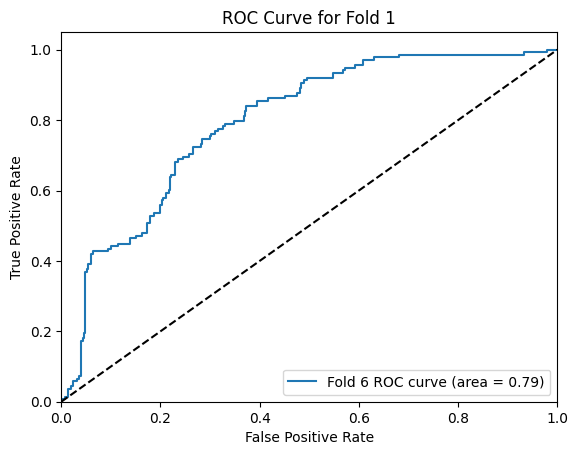

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve and ROC AUC for this fold
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'Fold 6 ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fold 1')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

# Assuming mean_fpr, mean_tpr, mean_auc, std_auc are defined for your model
data_to_export = {
    'best_fpr': fpr,
    'best_tpr': tpr,
    'best_roc_auc': roc_auc,
    'model_name': 'RNN JP'  # Change this for each model
}

# Exporting to a pickle file
with open(f'{data_to_export["model_name"]}_roc_data.pkl', 'wb') as file:
    pickle.dump(data_to_export, file)